In [1]:
import tensorflow as tf
import numpy as np

In [2]:
cifar10_ = tf.keras.datasets.cifar10

In [3]:
(x_train , y_train) , (x_test , y_test) = cifar10_.load_data()

In [4]:
(x_train.shape , y_train.shape) , (x_test.shape , y_test.shape)

(((50000, 32, 32, 3), (50000, 1)), ((10000, 32, 32, 3), (10000, 1)))

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
min(y_train) , max(y_train)

(array([0], dtype=uint8), array([9], dtype=uint8))

In [8]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
import matplotlib.pyplot as plt

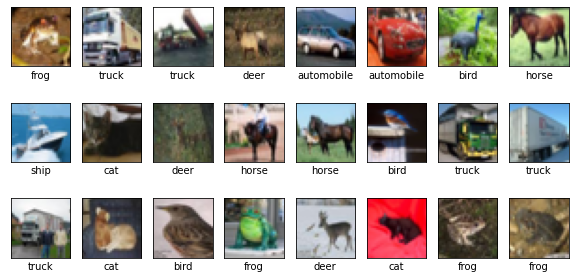

In [10]:
plt.figure(figsize=(10,5))
for i in range(24):
  plt.subplot(3,8,i+1) 
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[int(y_train[i])])

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
x_train/=255.
x_test/=255.

In [13]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [15]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

In [55]:
datgen = datagen.flow(x_train, y_train, batch_size=128)

In [56]:
model_ = tf.keras.applications.vgg16.VGG16(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=10)

In [57]:
model_.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [58]:
model = tf.keras.Sequential()
model.add(model_)

In [59]:
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [60]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

In [61]:
model.fit_generator(datgen, validation_data=(x_test, y_test), epochs=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
391/391 [==============================] - 32s 80ms/step - loss: 2.1886 - accuracy: 0.1482 - val_loss: 1.8099 - val_accuracy: 0.2881
Epoch 2/50
391/391 [==============================] - 31s 79ms/step - loss: 1.6888 - accuracy: 0.3390 - val_loss: 1.2955 - val_accuracy: 0.5213
Epoch 3/50
391/391 [==============================] - 31s 78ms/step - loss: 1.3320 - accuracy: 0.5113 - val_loss: 1.0960 - val_accuracy: 0.6043
Epoch 4/50
391/391 [==============================] - 30s 78ms/step - loss: 1.0935 - accuracy: 0.6170 - val_loss: 0.9436 - val_accuracy: 0.6776
Epoch 5/50
391/391 [==============================] - 30s 77ms/step - loss: 0.9462 - accuracy: 0.6728 - val_loss: 0.8949 - val_accuracy: 0.6961
Epoch 6/50
391/391 [==============================] - 30s 77ms/step - loss: 0.8568 - accuracy: 0.7077 - val_loss: 0.7852 - val_accuracy: 0.7449
Epoch 7/50
391/391 [==============================] - 30s 76ms/step - loss: 0.7864 - accuracy: 0.7372 - val_loss: 0.7982 - val_accuracy:

**We achieved validation accuracy of 87% (using vgg16 model) which can be further improved to more than 90% using more epochs**